In [2]:
# Goal: For the comparison with literature oxygen masses of Type Ib supernovae we want to
#       offer a comparison value that is recalibrated to the same temperature as our supernova
#       (mostly useful for those studies that do not estimate a specific temperature for their supernova)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.table as tbl
import astropy.units as u

In [12]:
# SN2022hgk from Das(2023)
# OI63xx line luminosity
L =  104 # 1e38 erg/s
L_err = 1.4 # 1e38 erg/s

D = 149 # Mpc
D_cm = 149 * u.Mpc.to(u.cm)

err_perc = L_err / L
print("L err [%%] = %f" % (err_perc*100))

# temperature range is 3500 - 4000
M_min = 2.6
M_max = 7.4

print("Mmin => %f" % (M_min * np.exp(2.28/0.3888) / np.exp(2.28/0.4)))
print("Mmax => %f" % (M_max * np.exp(2.28/0.3888) / np.exp(2.28/0.35)))
print("\pm %f" % (M_min * np.exp(2.28/0.3888) / np.exp(2.28/0.4) * err_perc))

# range also includes the uncertainty of the line I guess?
F = L * 1e38 / 4 / np.pi / D_cm**2

print("F: %e" % F)

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

F = np.random.normal(L, L_err, size=1000) * 1e38 / 4 / np.pi / D_cm**2
M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print(f"Mean={np.mean(M_u)} std={np.std(M_u)}")

print("\n\n")
print("3500K:")
print("Mmin => %f" % (M_min * np.exp(2.28/0.3500) / np.exp(2.28/0.4)))
print("Mmax => %f" % (M_max * np.exp(2.28/0.3500) / np.exp(2.28/0.35)))

L err [%] = 1.346154
Mmin => 3.063962
Mmax => 3.862798
\pm 0.041246
F: 3.915163e-15
Mu => 3.061336
Mean=3.0631287168109123 std=0.041173900082053384



3500K:
Mmin => 5.869663
Mmax => 7.400000


In [14]:
# SN2017iro from Kumar(2022)
F = 1.12e-14 # erg/s/cm^2
D = 30.8 # Mpc
M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

Mu => 0.374204


In [15]:
# iPTF13bvn from Kuncarayakti (2015)
F = 3.71e-15 # erg/s/cm^2
D = 26.79
M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

Mu => 0.093780


In [16]:
# 2009jf from Sahu (2011)
F = 3.74e-14 # erg/s/cm^2
D = 34.25 # Mpc
M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

Mu => 1.545188


In [17]:
# SN1996N from Sollerman
F = 25e-15 # erg/s/cm^2 (first epoch)
D = 22 # Mpc
M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

Mu => 0.426161


In [18]:
# SN1990I from Elmhamdi (2004)
# no measurement reported

In [19]:
# SN2020acat
Fmax = 8.407e-14 # erg/s/cm^2
Fmin = 2.590e-14
D = 35.3 # Mpc
Derr = 4.4

M_u = 1e8 * Fmax * D**2 * np.exp(2.28/0.3888)
print("Mu [max] => %f" % M_u)
M_u = 1e8 * Fmin * D**2 * np.exp(2.28/0.3888)
print("Mu [min] => %f" % M_u)

Mu [max] => 3.689598
Mu [min] => 1.136679


In [20]:
# SN2019ehk from Das (2023)
L = 1.72 # # 1e38 erg/s
D = 15.14 # Mpc from NED
D_cm = D * u.Mpc.to(u.cm)

# range also includes the uncertainty of the line I guess?
F = L * 1e38 / 4 / np.pi / D_cm**2

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

Mu => 0.050630


In [7]:
# sample from Das (2023)
L = np.array([
    1.72,
    0.15,
    0.93,
    #11.69,
    #6.32,
    0.01,
    0.08,
    0.11,
    #8.57,
    1.15
])

D = 1 # Mpc
D_cm = D * u.Mpc.to(u.cm)

F = L * 1e38 / 4 / np.pi / D_cm**2

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu [3888K] => %s" % repr(np.sort(M_u)))

M_u = 1e8 * F * D**2 * np.exp(2.28/0.4)
print("Mu [4000K] => %s" % repr(np.sort(M_u)))

# hmmmm!
# no. lets just put N/A there for now

Mu [3888K] => array([0.00029436, 0.00235487, 0.00323795, 0.00441539, 0.02737541,
       0.03385131, 0.05062979])
Mu [4000K] => array([0.00024979, 0.00199829, 0.00274764, 0.00374679, 0.02323007,
       0.02872536, 0.04296314])


In [29]:
# SN2011bm (Ic) from Valenti(2012)
F = 3.7e-14 # erg/s/cm^2
D = 95.6 # Mpc from NED

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu => %f" % M_u)

# flux ratio 6300/5577 ~ 20 - 40
# using Jerkstrand+2014 eqn 2
beta_ratio = 1.0/1.3
temp = -25790/np.log(1/20.0 /38 * beta_ratio)
print("Temp20 => %f" % temp)
temp = -25790/np.log(1/40.0 /38 * beta_ratio)
print("Temp40 => %f" % temp)

Mu => 11.909846
Temp20 => 3740.021276
Temp40 => 3398.415884


In [6]:
# 

In [11]:
# do same for SN2019odp now
D = 64 # Mpc
D_cm = D * u.Mpc.to(u.cm)

L = np.arange(100, 180) # 1e38

F = L * 1e38 / 4 / np.pi / D_cm**2

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3888)
print("Mu [3888K] => %s" % repr(np.sort(M_u)))

M_u = 1e8 * F * D**2 * np.exp(2.28/0.4)
print("Mu [4000K] => %s" % repr(np.sort(M_u)))

print('Late spectrum')

L = 16 # 1e38

F = L * 1e38 / 4 / np.pi / D_cm**2

M_u = 1e8 * F * D**2 * np.exp(2.28/0.3)
print("Mu [3000] => %s" % M_u)

M_u = 1e8 * F * D**2 * np.exp(2.28/0.35)
print("Mu [3500K] => %s" % M_u)

Mu [3888K] => array([2.94359241, 2.97302833, 3.00246426, 3.03190018, 3.0613361 ,
       3.09077203, 3.12020795, 3.14964388, 3.1790798 , 3.20851572,
       3.23795165, 3.26738757, 3.2968235 , 3.32625942, 3.35569534,
       3.38513127, 3.41456719, 3.44400312, 3.47343904, 3.50287496,
       3.53231089, 3.56174681, 3.59118274, 3.62061866, 3.65005458,
       3.67949051, 3.70892643, 3.73836236, 3.76779828, 3.7972342 ,
       3.82667013, 3.85610605, 3.88554198, 3.9149779 , 3.94441383,
       3.97384975, 4.00328567, 4.0327216 , 4.06215752, 4.09159345,
       4.12102937, 4.15046529, 4.17990122, 4.20933714, 4.23877307,
       4.26820899, 4.29764491, 4.32708084, 4.35651676, 4.38595269,
       4.41538861, 4.44482453, 4.47426046, 4.50369638, 4.53313231,
       4.56256823, 4.59200415, 4.62144008, 4.650876  , 4.68031193,
       4.70974785, 4.73918378, 4.7686197 , 4.79805562, 4.82749155,
       4.85692747, 4.8863634 , 4.91579932, 4.94523524, 4.97467117,
       5.00410709, 5.03354302, 5.06297894, 5.092

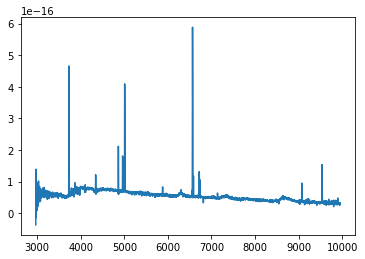

In [19]:
# load non fluxcal spec of hgk
import astropy.table as table
hgk = table.Table.read("/home/welterde/mess/2024/35/lris20220728_ZTF22aajakms_o1.spec", format='ascii')
hgk_z = 0.033
plt.plot(hgk['col1']/(1+hgk_z), hgk['col2'])

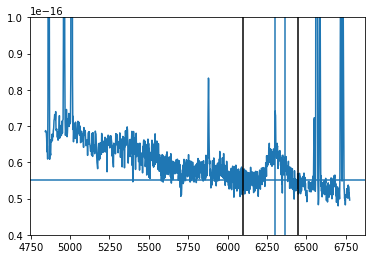

In [33]:
idx = np.logical_and(hgk['col1'] > 5000, hgk['col1'] < 7000)
plt.plot(hgk['col1'][idx]/(1+hgk_z), hgk['col2'][idx])
plt.ylim((4e-17, 1e-16))
plt.axvline(6300)
plt.axvline(6364)
bkg = 5.5e-17
plt.axhline(bkg)

plt.axvline(6100, color='black')
plt.axvline(6450, color='black')

In [36]:
restwave = hgk['col1']/(1+hgk_z)
flux = hgk['col2']

bkg = 5.5e-17

idx = np.logical_and(restwave > 6300, restwave < 6450)

total_flux = np.trapz(flux[idx], restwave[idx])
bkg_flux = np.trapz(bkg*np.ones(np.count_nonzero(idx)), restwave[idx])

print('total', total_flux)
print('bkg', bkg_flux)
print('diff', total_flux-bkg_flux)
print('Other Measurement', 3.915163e-15/(total_flux-bkg_flux))

total 8.67659435714908e-15
bkg 8.183456921587608e-15
diff 4.931374355614722e-16
Other Measurement 7.939293831023612
